In [8]:
import numpy as np
import matplotlib.pyplot as plt
from reservoirpy.nodes import Reservoir, IPReservoir, NVAR
from reservoirpy.nodes import FORCE, LMS, RLS, Ridge, ScikitLearnNode

In [9]:
t = np.linspace(0, 100, 1000)
data = np.sin(t)

In [10]:
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [11]:
X_train = train_data[:-1].reshape(-1, 1)
Y_train = train_data[1:].reshape(-1, 1)
X_test = test_data[:-1].reshape(-1, 1)
Y_test = test_data[1:].reshape(-1, 1)

In [12]:
reservoir = Reservoir(200, lr=0.1)
reservoir.spectral_radius = 0.9
reservoir.input_scaling = 0.5

readout = Ridge()

In [13]:
reservoir >> readout
readout.fit(reservoir.run(X_train), Y_train)

Running Reservoir-0: 100%|██████████| 799/799 [00:00<00:00, 31375.21it/s]


'Ridge-0': Ridge(ridge=0.0, input_bias=True, in=200, out=1)

In [14]:
predictions = readout.run(reservoir.run(X_test))

Running Ridge-0: 100%|██████████| 199/199 [00:00<00:00, 60417.41it/s]


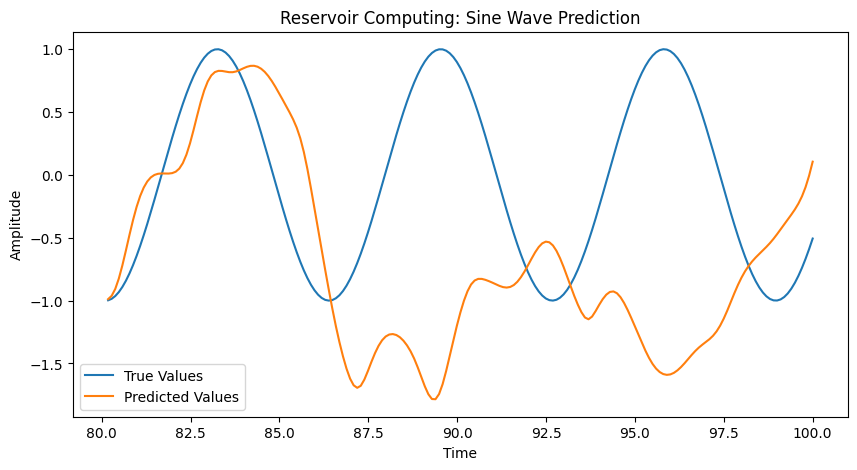

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(t[train_size+1:], Y_test.flatten(), label="True Values")
plt.plot(t[train_size+1:], predictions.flatten(), label="Predicted Values")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Reservoir Computing: Sine Wave Prediction")
plt.show()